<a href="https://colab.research.google.com/github/cerasole/EnvironmentalRadioactivity/blob/main/Notebooks/Presenze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numero di presenze del corso

In questo Colab, analizziamo il numero di persone che hanno partecipato a questa serie di lezioni relativi alla radioattività ambientale.

Le domande cui vogliamo rispondere sono le seguenti.

 - Quale funzione descrive al meglio l'andamento del numero di persone presenti al passare delle lezioni?
 - Quanto valgono i parametri di questa funzione?

Più in generale, questo Colab è un occasione per
 - descrivere il modo che si usa in fisica ed in statistica per affrontare dei problemi di modellizzazione di dati con leggi matematiche
 - applicare questi modi ad un caso semplice, chiaro e che ci riguarda in prima persona



## Step 1 - Visualizzazione dei dati

Cominciamo con importare le librerie necessarie, inserire i dati e fare un primo grafico, usando le informazioni che abbiamo visto nella prima lezione di laboratorio

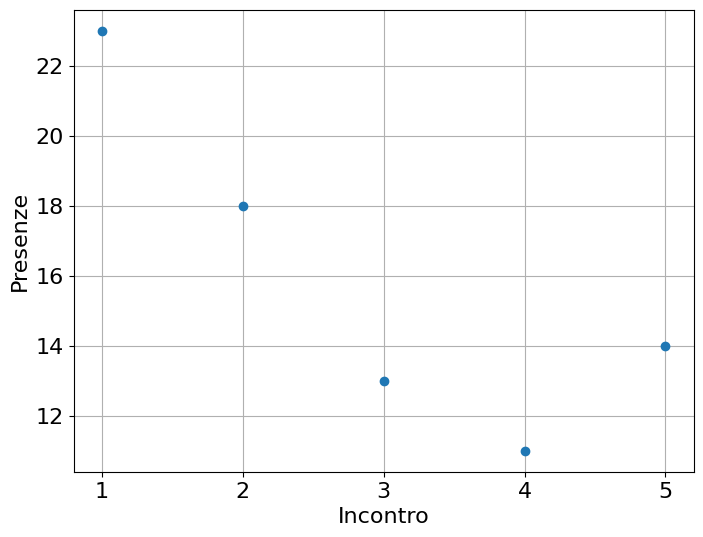

In [21]:

# Importiamo le librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size = 16)

# Definiamo i dati
presenze = np.array([23, 18, 13, 11, 14])
incontri = np.arange(1, len(presenze)+1)

# Plot
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(incontri, presenze, ls = "None", marker = "o", markersize = 6, capsize = 3)
ax.set_xlabel("Incontro")
ax.set_ylabel("Presenze")
ax.set_xticks(incontri.astype("int"))
ax.grid()

## Step 2 - Stima (approssimata) delle incertezze sui numeri dei conteggi

Consideriamo un universo parallelo in cui nel vostro liceo viene nuovamente proposto questo corso. Quante persone si presenterebbero alla prima lezione?

Nell'universo in cui viviamo, ne sono venute 23.
Però, in eventuali altri, ne sarebbero potuti venire 20, 22, 19, 24, 28...

Analogamente vale per tutte le altre lezioni avvenute nei vari universi paralleli!

Dunque, *come si calcola l'incertezza su un numero di conteggi?*

**Risposta rapida, veloce e approssimata**: *l'incertezza si può approssimare con la radice quadrata del numero di conteggi*.

Questa era la risposta che abbiamo dato nella seconda lezione di laboratorio.

In linea di principio, questa approssimazione è ben accettabile quando il numero di conteggi è, approssimativamnte, maggiore di 30. Non è propriamente il nostro caso, soprattutto perchè ci sono stati incontri anche con 11 persone, per cui è un'approssimazione un po' grossolana senza dubbio.

Completiamo il grafico usando queste incertezze.

Nell'appendice A, in fondo a questo Colab, viene riportato il modo (più complesso) in cui si valutano le incertezze sui numeri di conteggi in modo NON approssimato.


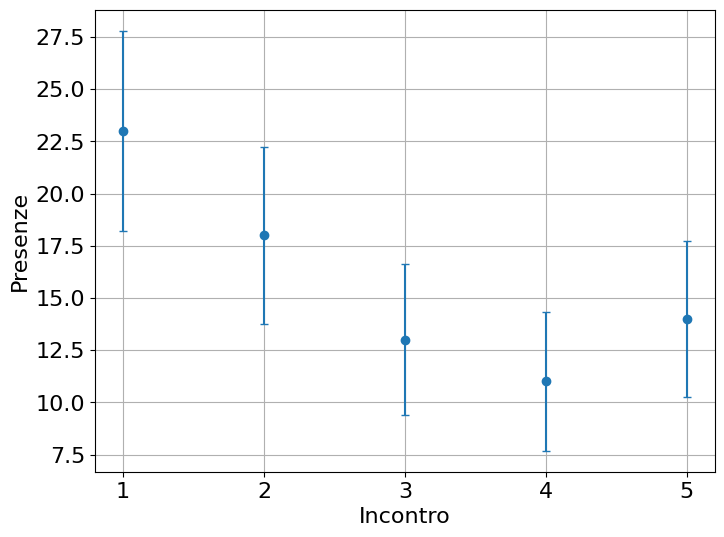

In [22]:
presenze_err = np.sqrt(presenze)

# Plot
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(incontri, presenze, yerr = presenze_err, ls = "None", marker = "o", markersize = 6, capsize = 3)
ax.set_xlabel("Incontro")
ax.set_ylabel("Presenze")
ax.set_xticks(incontri.astype("int"))
ax.grid()

## Step 3 - Formulazione delle ipotesi su quale legge funzionale può essere la migliore

Questa è la fase in cui dobbiamo guardare il plot e pensare quale legge funzionale può essere usata.

A me ne vengono 3 in mente:

 - una legge costante: $f_1(x; q) = q$
 - una legge lineare: $f_2(x; q, m) = mx + q$
 - un'esponenziale decrescente: $f_3(x; C, \tau) = C \, e^{-x/\tau}$
 - un'esponenziale decrescente più una costante: $f_4(x; C, \tau, q) = C \, e^{-x/\tau} + q$

Ciascuna di queste funzioni è funzione del *variabile* numero dell'incontro $x$ e dipende da dei *parametri* (indicati nella parentesi della funzione, dopo il punto e virgola):

 - $f_1$ dipende da 1 parametro, ossia $q$
 - $f_2$ dipende da 2 parametri, ossia $q$ ed $m$
 - $f_3$ dipende da 2 parametri, ossia $C$ (una costante moltiplicativa) e $\tau$ (il tempo caratteristico della decrescita esponenziale, ossia il tempo dopo il quale il numero si riduce di un fattore $e\approx2.71$, ossia se $f_3(x_0) = C_0$, allora $f_3(x_0 + \tau) = C_0 / e$)
 - $f_4$ dipende da 3 parametri, ossia gli stessi di $f_3$ più la costante $q$

$f_3$ è anche la legge con cui il numero di nuclei radioattivi decade nel tempo.

Definiamo queste leggi funzionali in Python attraverso delle "funzioni" in Python e vediamo come si usano.

In [91]:
def f_1 (x, q):
  return q * np.ones(x.shape)

def f_2 (x, q, m):
  return q + m * x

def f_3 (x, C, tau):
  return C * np.exp(-(x-1)/tau)

def f_4 (x, C, tau, q):
  return C * np.exp(-(x-1)/tau) + q

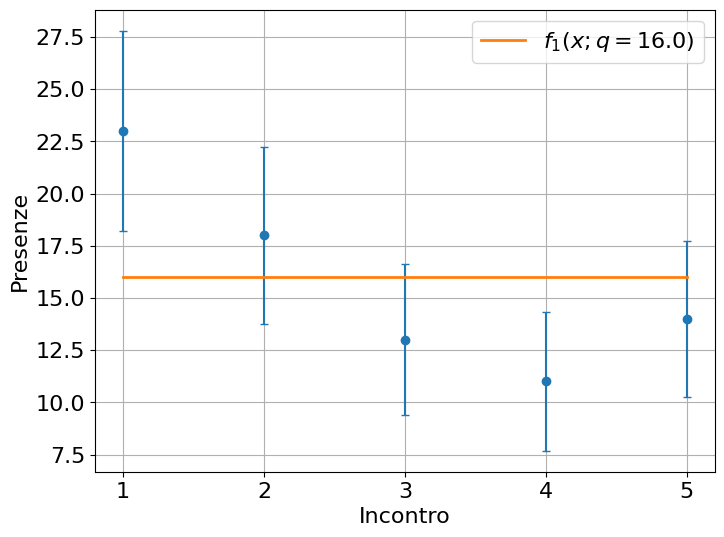

In [92]:
# Plot di prima
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(incontri, presenze, yerr = presenze_err, ls = "None", marker = "o", markersize = 6, capsize = 3)
ax.set_xlabel("Incontro")
ax.set_ylabel("Presenze")
ax.set_xticks(incontri.astype("int"))
ax.grid()

# Griglia delle variabili su cui verranno calcolate le funzioni
x = np.linspace(1, incontri[-1])

lw = 2

# Plot delle funzioni con valori ragionevoli dei parametri
_q = 16
ax.plot(x, f_1(x, q = _q), ls = "solid", lw = lw, label = "$f_1(x; q = %.1f)$" % _q)
_q = 24
_m = -2.5
#ax.plot(x, f_2(x, q = _q, m = _m), ls = "dotted", lw = lw, label = "$f_2(x; q = %.1f, m = %.2f)$" % (_q, _m))
_C = 24
_tau = 4
#ax.plot(x, f_3(x, C = _C, tau = _tau), ls = "dashed", lw = lw, label = "$f_3(x; C = %.1f, \\tau = %.2f)$" % (_C, _tau))
_C = 12
_tau = 1.4
_q = 12
#ax.plot(x, f_4(x, C = _C, tau = _tau, q = _q), ls = "dashdot", lw = lw, label = "$f_4(x; C = %.1f, \\tau = %.2f, q = %.1f)$" % (_C, _tau, _q))

# Legenda
ax.legend();

## Step 4 - Fit con $f_1$

Partiamo con la funzione più semplice, ossia $f_1$. In base a quale valore viene affidato al parametro $q$, questa funzione può descrivere meglio o peggio i dati.

 Se $q=100$, la descriverebbe molto male!
 Se $q=16$, la descriverebbe molto meglio!

Come posso *quantificare questo meglio o peggio*?

Si utilizza una quantità chiamata $\chi^2$ (chi-quadrato), che rappresenta la somma dei quadrati delle differenze fra i dati reali $y$ e le predizioni del  modello $f(x)$, in unità delle incertezze $\sigma$ sui dati:

$\chi^2 = \sum_{i=1}^{N} \left( \frac{ y_i - f(x_i)} {\sigma_i}\right)^2$

Questa quantità rappresenta quanto il modello descrive bene i dati:

 - se i dati $y$ sono ben descritti dal modello $f(x)$, allora $y \approx f(x) → \chi^2 \approx 0$
 - se i dati $y$ sono descritti male dal modello $f(x)$, allora $y - f(x)$ sarà relativamente grande e, poichè $\chi^2$ è somma di valori tutti positivi perchè elevati al quadrato, il $\chi^2$ sarà elevato.

In questo caso, poichè $f(x) = f_1(x; p)$, allora il valore di $\chi^2$ dipenderà dal valore di $p$:

$\chi^2 (p) = \sum_{i=1}^{N} \left( \frac{ y_i - f(x_i; p)} {\sigma_i}\right)^2$

Dunque sarà una semplice funzione di una variabile, ossia $p$.

La calcoliamo subito.

In [118]:
def f_1 (x, q):
  return q * np.ones(len(x))

def chi_square (x, y, sigma, f, *params):
  return np.sum( ((y - f(x, *params) ) / sigma)**2 , axis = 0)

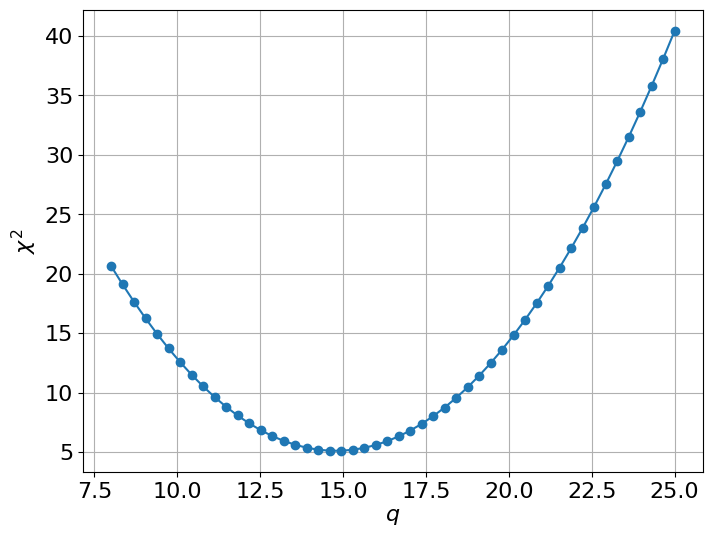

In [127]:
# Calcolo del chi^2
_q_vec = np.linspace(8, 25)
chi_1 = np.array(
    [ chi_square(incontri, presenze, presenze_err, f_1, _q) for _q in _q_vec]
)

# Plot
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(_q_vec, chi_1, marker = "o", markersize = 6, capsize = 3)
ax.set_xlabel("$q$")
ax.set_ylabel("$\chi^2$")
ax.grid();

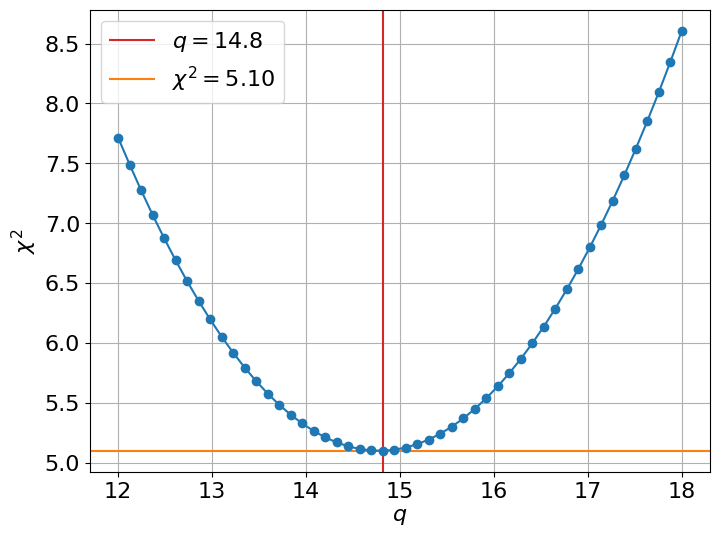

In [155]:
_q_vec = np.linspace(12, 18)
chi_1 = np.array(
    [ chi_square(incontri, presenze, presenze_err, f_1, _q) for _q in _q_vec]
)

# Plot
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(_q_vec, chi_1, marker = "o", markersize = 6, capsize = 3)
ax.set_xlabel("$q$")
ax.set_ylabel("$\chi^2$")
ax.grid()


min_chi1 = np.min(chi_1)
_q_min = _q_vec[np.argmin(chi_1)]
ax.axvline(_q_min, label = "$q = %.1f$" % _q_min, color = "tab:red")
ax.axhline(min_chi1, label = "$\chi^2 = %.2f$" % min_chi1, color = "tab:orange", ls = "solid")
ax.legend();

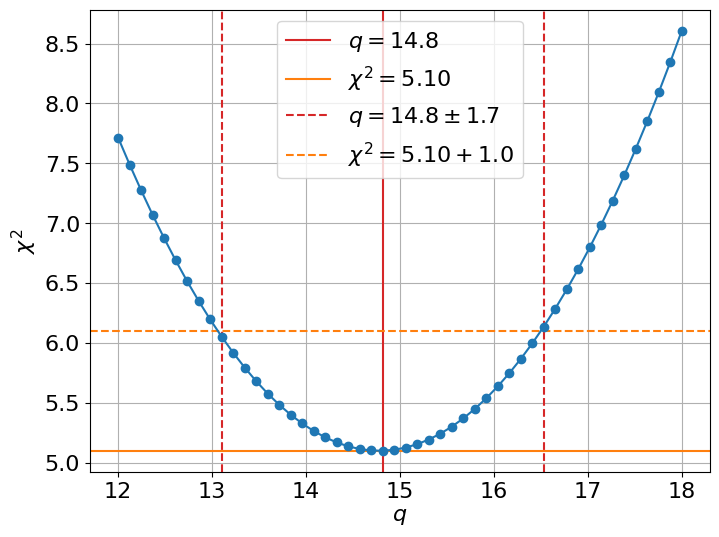

In [156]:
chi_square_increment = 1.
_q_min_err = np.abs(_q_min - _q_vec[np.argmin(np.abs(chi_1 - (min_chi1 + chi_square_increment)))])

# Plot
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(_q_vec, chi_1, marker = "o", markersize = 6, capsize = 3)
ax.set_xlabel("$q$")
ax.set_ylabel("$\chi^2$")
ax.grid()

min_chi1 = np.min(chi_1)
_q_min = _q_vec[np.argmin(chi_1)]
ax.axvline(_q_min, label = "$q = %.1f$" % _q_min, color = "tab:red")
ax.axhline(min_chi1, label = "$\chi^2 = %.2f$" % min_chi1, color = "tab:orange", ls = "solid")

ax.axvline(_q_min - _q_min_err, ls = "dashed", color = "tab:red", label = "$q = %.1f \pm %.1f$" % (_q_min, _q_min_err))
ax.axvline(_q_min + _q_min_err, ls = "dashed", color = "tab:red")
ax.axhline(min_chi1 + chi_square_increment, label = "$\chi^2 = %.2f + %.1f$" % (min_chi1, chi_square_increment), color = "tab:orange", ls = "dashed")
ax.legend();

In [150]:
!pip install iminuit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 7.1 MB/s eta 0:00:00


In [154]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

lsq = LeastSquares (incontri, presenze, presenze_err, f_1)
m = Minuit(lsq, q = 16)
m.migrad()
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.1 (χ²/ndof = 1.3)        │              Nfcn = 16               │
│ EDM = 2.2e-19 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ q    │   14.8    │    1.7    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────┐
│   │    q │
├───┼──────┤
│ q │ 2.96 │
└───┴──────┘

In [157]:
 min_chi1 / (len(incontri) - 1)

1.2750875919075764

## Appendice A - Stima corretta delle incertezze

Nella seconda lezione di laboratorio, abbiamo visto la distribuzione binomiale: date $N$ ripetizioni indipendenti di un evento, tali che in ciascuna ripetizione c'è una probabilità $p$ che una certa condizione si verifichi, la probabilità che il numero di volte

Avevamo applicato ciò al caso del calcolo delle probabilità del numero di volte $x$ in cui esce il 2 (in una singola ripetizione, ciò avviene con probabilità $p=\frac{1}{6}$) se lancio un dado N = 10 volte.